<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-hsgz8426
  Entered build tracker: /tmp/pip-build-tracker-hsgz8426
  Created temporary directory: /tmp/pip-install-92lh25eq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-18zp9i32
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [79]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [80]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [81]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.43, -7.65, -6.92, -6.21, -5.58, -4.96, -4.35, -3.74, -3.13, -2.52, -1.91, -1.3, -0.69, 0.48, 0.97, 1.46, 2.05, 2.64, 3.23, 3.82, 4.41, 5.0, 5.59, 6.18, 6.77, 7.36, 8.05, 8.74, 9.43, 10.12]


In [82]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [83]:
# def sphere(x):
#     return sum(x**2)

In [84]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [86]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [87]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [88]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [89]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [90]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [91]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [92]:
costs = []
errors = []

In [93]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [94]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100
Iteration 1: Best Cost = 61339.91492962636
Iteration 2: Best Cost = 51286.80527297162


<ipython-input-85-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-82-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999322 -4317.89999322 -4317.89999383 -4317.8999946
 -4317.8999946  -4317.89999492 -4317.89999492 -4317.89999505
 -4317.89999505 -4317.8999955  -4317.8999955  -4317.89999585
 -4317.89999585 -4317.89999606 -4317.89999606 -4317.89999618
 -4317.89999632 -4317.89999694 -4317.89999694 -4317.89999729
 -4317.89999729 -4317.89999755 -4317.89999755 -4317.89999755
 -4317.89999755 -4317.89999766 -4317.89999779 -4317.89999779
 -4317.89999782 -4317.89999782 -4317.89999804 -4317.89999822
 -4317.89999822 -4317.89999835 -4317.89999835 -4317.89999835
 -4317.89999838 -4317.89999838 -4317.89999839 -4317.89999873
 -4317.89999887 -4317.89999887 -4317.89999895 -4317.89999901
 -4317.89999907 -4317.89999911 -4317.89999932 -4317.89999932
 -4317.89999938 -4317.89999938 -4317.8999994  -4317.8999994
 -4317.8999994  -4317.8999994  -4317.89999941 -4317.89999941
 -4317.89999942 -4317.8999995  -4317.8999995  -4317.89999957
 -4317.89999968 -4317.8999997  -4317

In [95]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

3.1604940886609256e-11
0.26786536537963457
0.00019963857738503066
2.5379449652973562e-09
1.3649582932279714
1.4096378815429205
12987.281670001521
9471.57104419089
861.4319207282576
10944.724495529965
29920.05887064291
13242.6950993572
1149.1824874730278
11856.586466339675
6.033372624539851
682.1000000001941
682.1011231875318
21940.32764081945
17513.263150997715
3.579110646652083
5.00011028427803
81473.65641559107
49.90557504544248
122.82995483487232





Problem 1 Best Cost: [ 6.13399149e+04  5.12868053e+04  4.00405142e+04  3.00464890e+04
  2.18901376e+04  1.33397009e+04  1.00962311e+04  8.84091808e+03
  7.53941409e+03  5.19226927e+03  5.03340808e+03  3.14777127e+03
  2.73052276e+03  2.03408354e+03  1.33883585e+03  1.33883585e+03
  6.38383894e+00 -1.17164090e+01 -3.35236504e+01 -3.32130631e+02
 -3.32130631e+02 -3.56748205e+02 -3.98191037e+02 -5.37868225e+02
 -5.52152457e+02 -6.10668188e+02 -6.14275459e+02 -6.71442400e+02
 -7.67810674e+02 -7.67810674e+02 -7.67810674e+02 -7.78869430e+02
 -8.11291095e+02 -8.11291095e+02 -8.11291095e+02 -8.22783524e+02
 -8.47367307e+02 -8.66849001e+02 -8.66849001e+02 -8.87757502e+02
 -9.42462370e+02 -9.42462370e+02 -9.42462370e+02 -9.42462370e+02
 -9.61452738e+02 -9.85696825e+02 -9.85696825e+02 -9.85696825e+02
 -9.86655374e+02 -9.86655374e+02 -9.86655374e+02 -9.90790403e+02
 -1.00159304e+03 -1.00814888e+03 -1.01721076e+03 -1.03305733e+03
 -1.03305733e+03 -1.03305733e+03 -1.03305733e+03 -1.03875532e+03
 

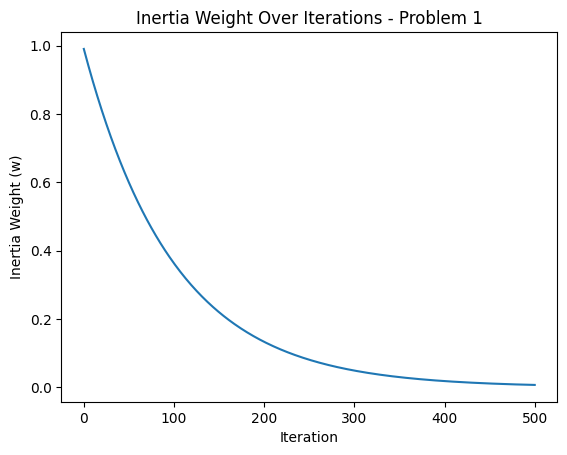

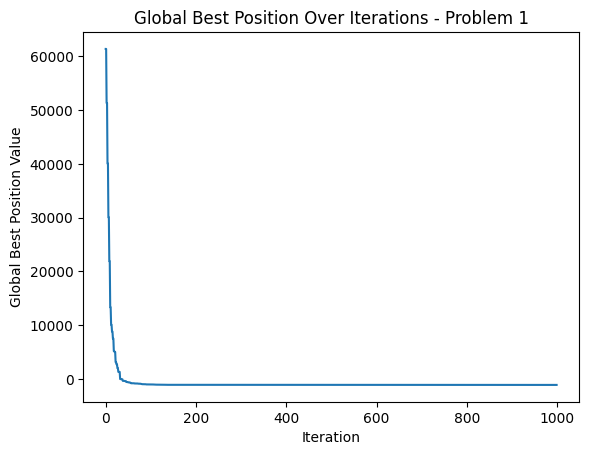




Problem 2 Best Cost: [-701.39661293 -701.41613402 -701.43203435 -701.44519486 -701.46950412
 -701.49389011 -701.50939331 -701.5383671  -701.55050219 -701.56114127
 -701.56114127 -701.57999228 -701.59230993 -701.61463785 -701.61463785
 -701.62662216 -701.64561348 -701.65822155 -701.66142449 -701.67601429
 -701.68951677 -701.70526838 -701.72595436 -701.72868836 -701.72868836
 -701.72920623 -701.74059036 -701.74265026 -701.76562028 -701.76562028
 -701.76562028 -701.76562028 -701.76562028 -701.77119217 -701.79163513
 -701.79266754 -701.79266754 -701.79266754 -701.8063491  -701.82268288
 -701.82268288 -701.83583227 -701.84169096 -701.84169096 -701.84169096
 -701.84406919 -701.84406919 -701.85970324 -701.85970324 -701.86780671
 -701.87016705 -701.88451328 -701.88451328 -701.89804855 -701.90987428
 -701.90987428 -701.90987428 -701.92782803 -701.92782803 -701.92782803
 -701.92782803 -701.92782803 -701.92782803 -701.93056005 -701.94069387
 -701.94511799 -701.95090602 -701.95090602 -701.95430

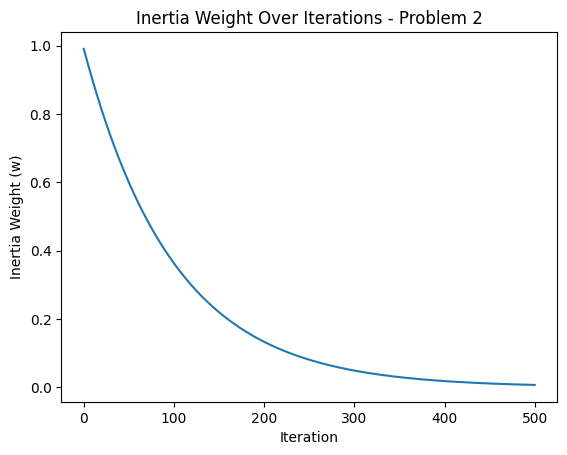

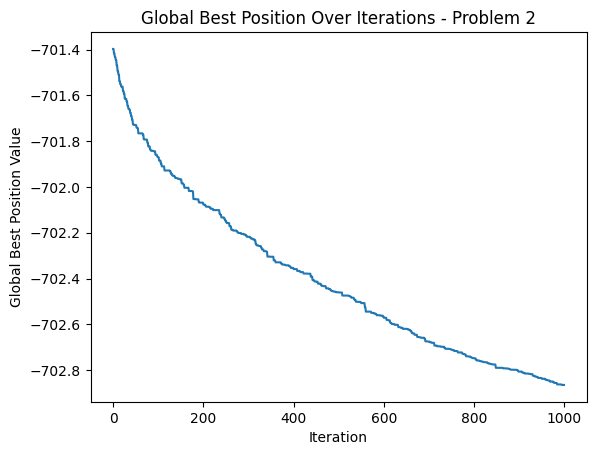




Problem 3 Best Cost: [ 3.64010379e+10  2.87777774e+10  2.62640534e+10  1.84079069e+10
  1.25155488e+10  8.74290869e+09  6.39434318e+09  4.75774436e+09
  4.44375743e+09  4.14014421e+09  4.02073952e+09  2.77996933e+09
  2.49108059e+09  1.91701195e+09  1.87500177e+09  1.37114983e+09
  1.28566975e+09  9.14072075e+08  6.74172081e+08  6.74172081e+08
  6.40245346e+08  6.40245346e+08  5.82460435e+08  5.47442358e+08
  5.05930169e+08  4.59277739e+08  4.01324315e+08  4.01324315e+08
  4.01324315e+08  4.01324315e+08  3.11260916e+08  2.91283278e+08
  2.83725009e+08  2.57543715e+08  2.57543715e+08  2.57543715e+08
  2.57543715e+08  2.15778058e+08  2.15778058e+08  2.15778058e+08
  1.92155931e+08  1.53235402e+08  1.53235402e+08  1.37425154e+08
  1.24418298e+08  1.24418298e+08  1.19432669e+08  8.97230038e+07
  8.59858529e+07  8.59858529e+07  8.27208363e+07  7.73420018e+07
  6.59566487e+07  6.19068523e+07  6.19068523e+07  6.15804694e+07
  4.94459881e+07  4.94459881e+07  4.94459881e+07  4.36829770e+07
 

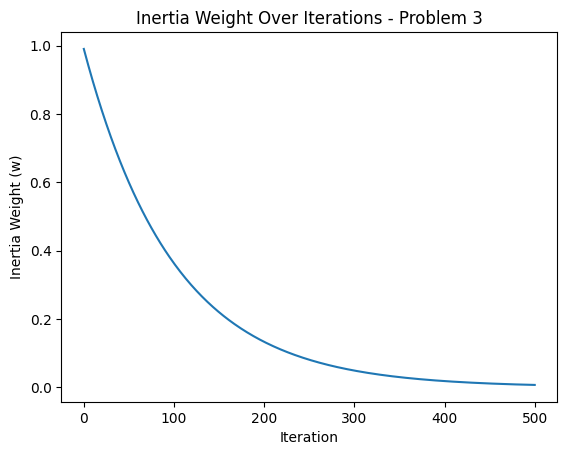

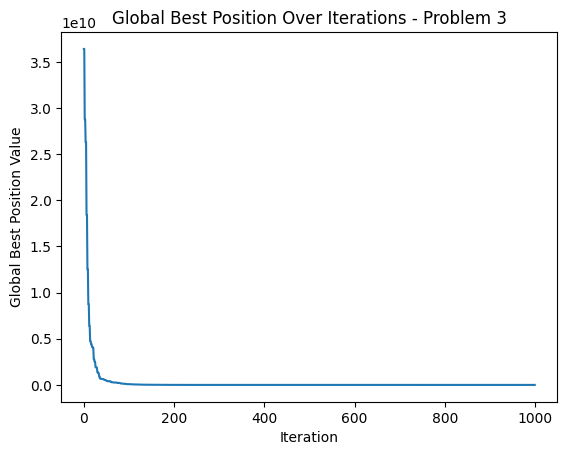




Problem 4 Best Cost: [ 3.30761071e+05  2.68304228e+05  1.98749154e+05  1.53979850e+05
  1.11219328e+05  7.18744957e+04  5.54267514e+04  4.29525624e+04
  3.42714146e+04  2.92375310e+04  2.89774391e+04  2.17042792e+04
  1.45010280e+04  1.09555507e+04  8.55119651e+03  7.67361290e+03
  6.99221707e+03  6.32409948e+03  6.28607681e+03  4.25944741e+03
  3.11590336e+03  3.11590336e+03  3.01910925e+03  1.82603512e+03
  1.82603512e+03  1.82603512e+03  1.51109872e+03  1.43665660e+03
  1.43665660e+03  1.43665660e+03  1.29976975e+03  1.01826548e+03
  7.52167288e+02  6.90781723e+02  4.51791914e+02  4.51791914e+02
  4.51791914e+02  3.75161976e+02  3.75161976e+02  3.75161976e+02
  3.52824893e+02  3.52824893e+02  2.73888512e+02  2.38888930e+02
  1.42169791e+02  5.89673271e+01  5.89673271e+01  5.89673271e+01
  2.13459763e+01  2.13459763e+01  2.13459763e+01  2.13459763e+01
  7.26513342e+00 -5.89275284e+01 -5.89275284e+01 -9.35729799e+01
 -9.35729799e+01 -1.16997793e+02 -1.41809160e+02 -1.41809160e+02
 

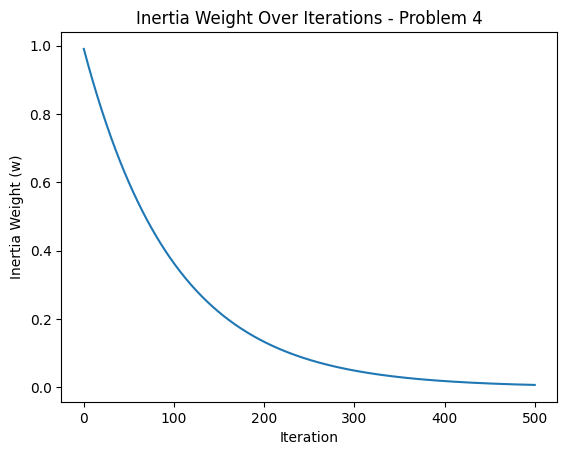

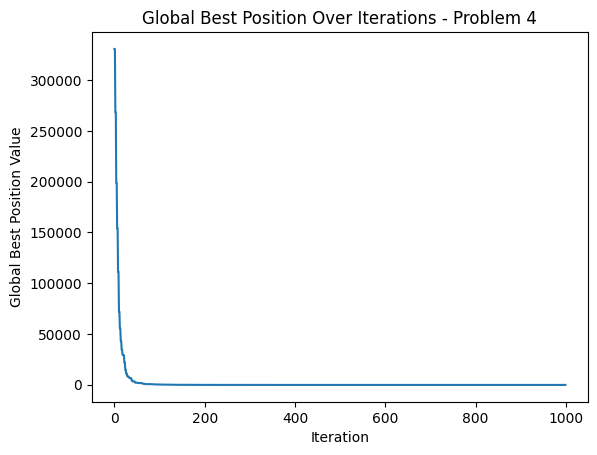




Problem 5 Best Cost: [-334.16607944 -334.20610864 -334.24266757 -334.282139   -334.34055364
 -334.37156014 -334.40550452 -334.44315863 -334.46994907 -334.51850302
 -334.55121706 -334.5781676  -334.59519209 -334.65416468 -334.70795516
 -334.7115882  -334.71204441 -334.77375187 -334.77375187 -334.78027028
 -334.78027028 -334.81969091 -334.81969091 -334.81969091 -334.81969091
 -334.81969091 -334.85186238 -334.85186238 -334.85186238 -334.85186238
 -334.86871453 -334.86871453 -334.88797532 -334.90643984 -334.92208472
 -334.92626272 -334.92626272 -334.94109702 -335.00544647 -335.00544647
 -335.00544647 -335.02416981 -335.02416981 -335.02787475 -335.02787475
 -335.02787475 -335.02990741 -335.0306848  -335.09080231 -335.09080231
 -335.11762165 -335.13685078 -335.13685078 -335.14217559 -335.14217559
 -335.14492049 -335.14660106 -335.14660106 -335.14660106 -335.2076581
 -335.2076581  -335.2076581  -335.2076581  -335.2076581  -335.22309026
 -335.22309026 -335.230362   -335.230362   -335.230362

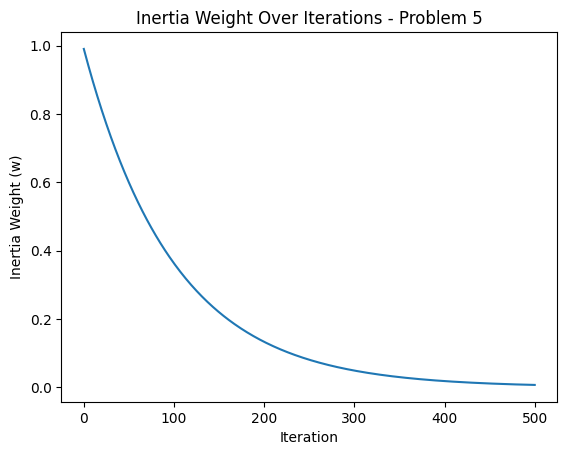

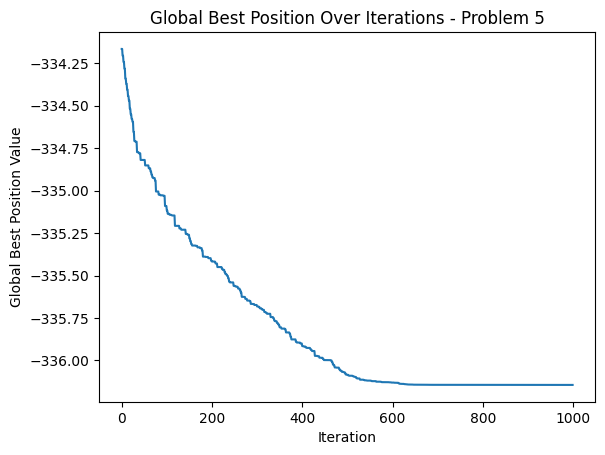




Problem 6 Best Cost: [-183.52419986 -183.57995228 -183.5974335  -183.66283257 -183.72287537
 -183.75236278 -183.77408304 -183.78553919 -183.81628441 -183.84750628
 -183.91271175 -183.93267175 -183.93267175 -183.95645841 -183.99282559
 -183.99282559 -184.00227895 -184.00227895 -184.02798013 -184.03531253
 -184.04768381 -184.04768381 -184.06244765 -184.0859734  -184.0859734
 -184.1050209  -184.10692796 -184.10692796 -184.10692796 -184.11151302
 -184.11304489 -184.11304489 -184.1233458  -184.13506863 -184.14152544
 -184.15846747 -184.16488642 -184.17438032 -184.17654969 -184.17654969
 -184.17654969 -184.18433874 -184.187506   -184.187506   -184.20459157
 -184.22245297 -184.22824073 -184.22824073 -184.23122516 -184.23465058
 -184.23465058 -184.23905174 -184.23905174 -184.24658196 -184.24658196
 -184.24977783 -184.24977783 -184.26059608 -184.26188374 -184.274254
 -184.27760359 -184.27875972 -184.27875972 -184.2835726  -184.2835726
 -184.2835726  -184.2835726  -184.28761862 -184.28845458 

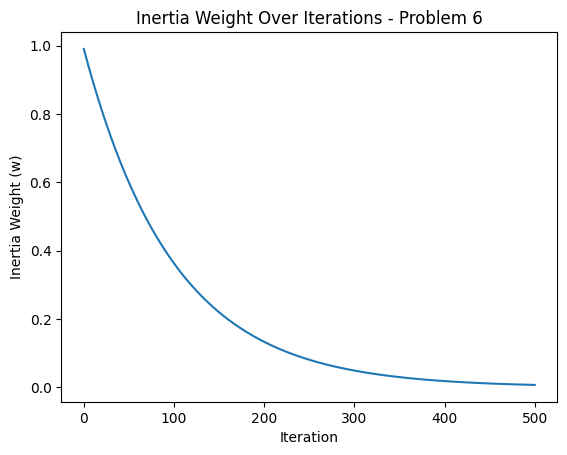

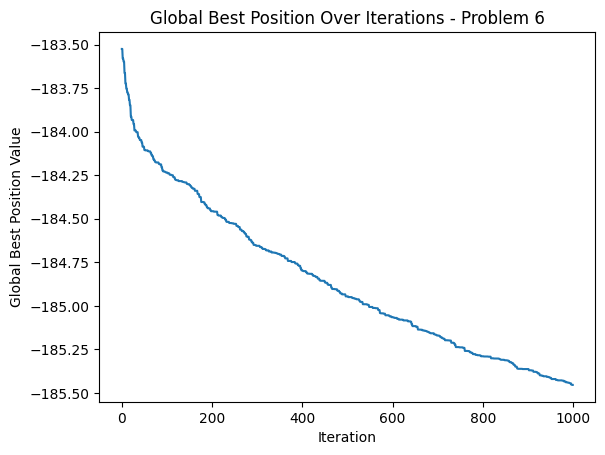




Problem 7 Best Cost: [51591.71350552 43862.00120663 43862.00120663 43862.00120663
 43862.00120663 43862.00120663 43862.00120663 41685.76479296
 41098.3066506  41098.3066506  38184.54559747 38184.54559747
 37637.18206517 35585.80471485 35535.14398572 35535.14398572
 33369.74863129 32420.42869973 32420.42869973 32420.42869973
 32420.42869973 30790.8492976  28697.48533246 26530.45053821
 26530.45053821 25379.30957547 25379.30957547 25379.30957547
 25379.30957547 23810.42360095 23810.42360095 23810.42360095
 23810.42360095 23537.67859622 23537.67859622 22574.28123232
 22574.28123232 20251.66753452 20251.66753452 20251.66753452
 20251.66753452 20251.66753452 20251.66753452 20251.66753452
 20251.66753452 19584.27627731 19584.27627731 19584.27627731
 19358.09945879 19358.09945879 18203.34865916 18203.34865916
 18203.34865916 18203.34865916 18203.34865916 18203.34865916
 17426.31931225 17426.31931225 17302.90559329 16994.74388328
 16802.37941356 16802.37941356 16553.89741182 16325.3750445
 

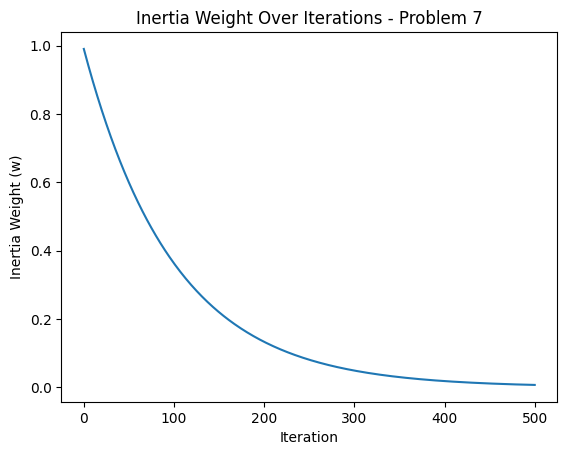

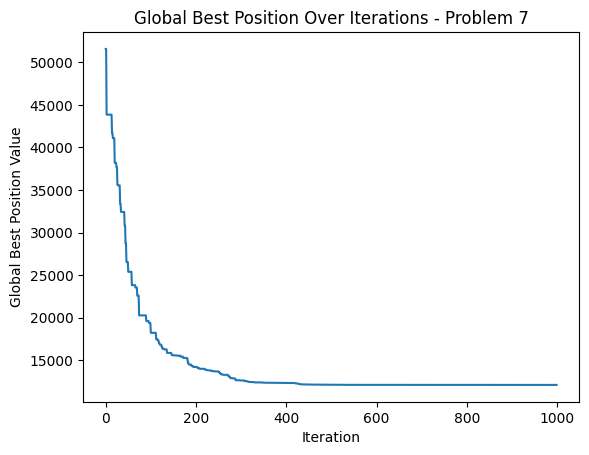




Problem 8 Best Cost: [41722.55143535 41584.73634201 41584.73634201 35570.82857714
 35570.82857714 35570.82857714 29585.15717808 29585.15717808
 29585.15717808 29585.15717808 29585.15717808 28126.12926571
 28126.12926571 28126.12926571 22940.08153186 22940.08153186
 19056.69280277 19056.69280277 19056.69280277 19056.69280277
 19056.69280277 19056.69280277 19056.69280277 19056.69280277
 17166.78216812 17166.78216812 17166.78216812 17166.78216812
 16909.40083741 16875.66938512 16508.40718126 16508.40718126
 16508.40718126 16508.40718126 16508.40718126 15207.43555027
 15207.43555027 15207.43555027 15207.43555027 15207.43555027
 15207.43555027 15207.43555027 15207.43555027 15207.43555027
 15207.43555027 14505.52157475 14505.52157475 14505.52157475
 14505.52157475 14505.52157475 14505.52157475 14505.52157475
 14505.52157475 14505.52157475 14250.30758749 14250.30758749
 14250.30758749 14250.30758749 14250.30758749 14056.03947537
 14056.03947537 14056.03947537 14056.03947537 14056.03947537


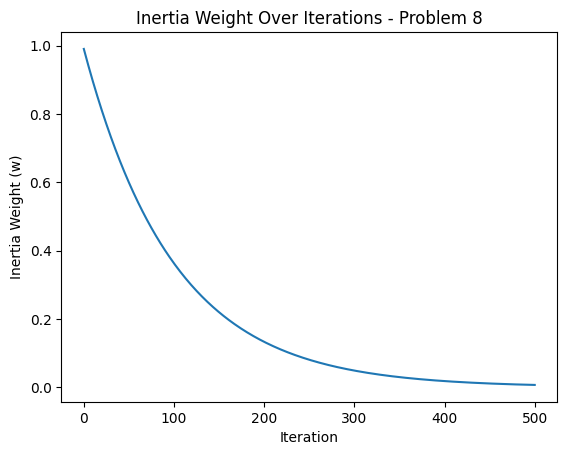

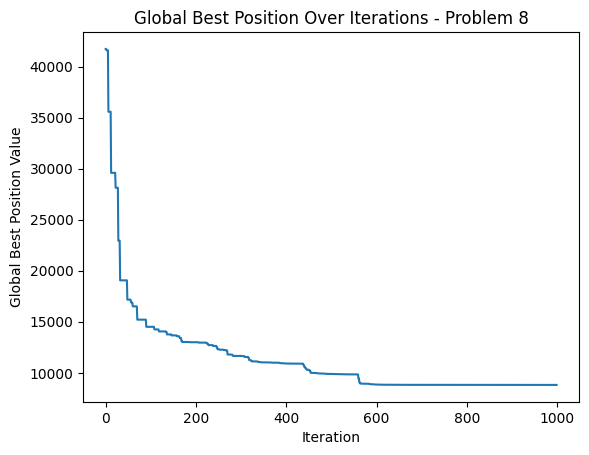




Problem 9 Best Cost: [ 1.89797487e+05  1.77437252e+05  9.21528874e+04  9.21528874e+04
  7.80680290e+04  7.80680290e+04  7.80680290e+04  7.80680290e+04
  7.80680290e+04  7.80680290e+04  7.80680290e+04  7.23928435e+04
  7.23928435e+04  5.51375534e+04  5.51375534e+04  5.51375534e+04
  4.17638953e+04  4.17638953e+04  4.17638953e+04  4.17638953e+04
  4.17638953e+04  4.17638953e+04  3.79580822e+04  3.79580822e+04
  3.79580822e+04  3.15421962e+04  3.15421962e+04  3.15421962e+04
  3.15421962e+04  3.15421962e+04  3.15421962e+04  3.15421962e+04
  3.15421962e+04  3.15421962e+04  3.15421962e+04  3.15421962e+04
  3.15421962e+04  2.59111470e+04  1.22810879e+04  1.22810879e+04
  1.22810879e+04  1.22810879e+04  1.22810879e+04  1.22810879e+04
  1.22810879e+04  1.22810879e+04  1.22810879e+04  1.22810879e+04
  1.22810879e+04  1.22810879e+04  1.22810879e+04  1.22810879e+04
  1.07565351e+04  1.07565351e+04  9.25430807e+03  9.25430807e+03
  6.59938720e+03  6.59938720e+03  4.62833516e+03  4.62833516e+03
 

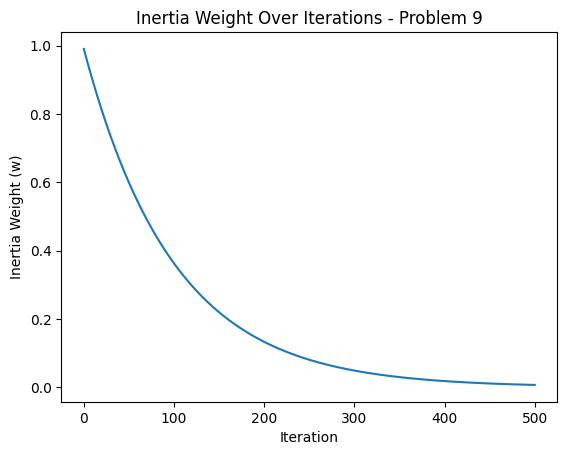

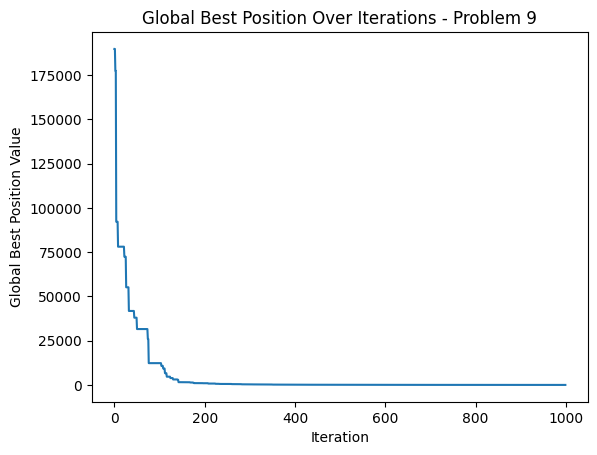




Problem 10 Best Cost: [34458.62316466 34458.62316466 24118.55031549 24118.55031549
 24118.55031549 24118.55031549 24118.55031549 23711.81675962
 22513.03968609 22503.67866822 22503.67866822 22341.35540592
 22341.35540592 21629.12828901 21629.12828901 21629.12828901
 21629.12828901 21629.12828901 21038.03456074 18886.65211395
 18886.65211395 18449.85285136 18449.85285136 16621.94566157
 16287.03548498 15296.27883224 15296.27883224 15296.27883224
 15296.27883224 15288.79739728 15288.79739728 15288.79739728
 15195.91241382 15195.91241382 15195.91241382 15098.22631358
 14406.33796332 14406.33796332 14384.30786391 14384.30786391
 14384.30786391 14384.30786391 14384.30786391 14321.62164186
 14304.49318124 14304.49318124 14252.1981883  13753.82849876
 13753.82849876 13753.82849876 13722.71425256 13722.71425256
 13672.65475387 13672.65475387 13672.65475387 13517.12362482
 13517.12362482 13517.12362482 13386.63284842 13386.63284842
 13386.63284842 13386.63284842 13314.48744959 13290.68911286

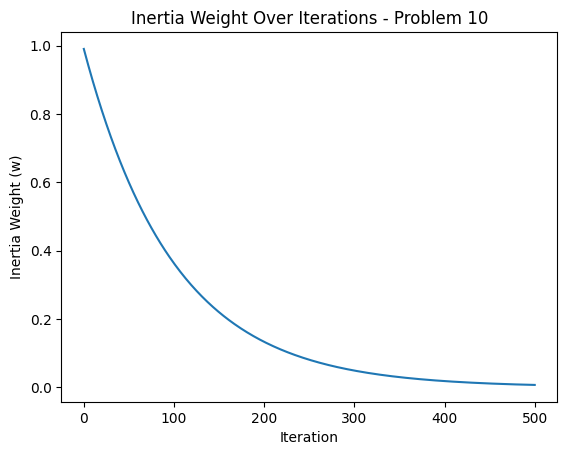

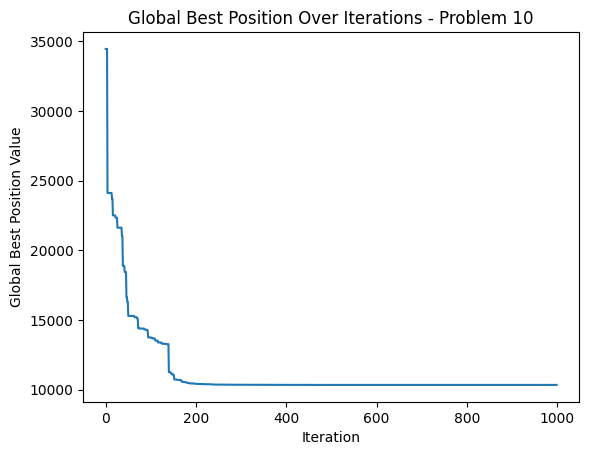




Problem 11 Best Cost: [51772.9860968  47265.37667931 44827.24925624 44827.24925624
 44827.24925624 44827.24925624 44653.75649813 44653.75649813
 44653.75649813 44233.20046325 43309.36053996 43309.36053996
 43309.36053996 42515.35329995 42473.22521108 42473.22521108
 42473.22521108 42284.02263684 42284.02263684 42211.42876532
 41468.21450498 41468.21450498 41468.21450498 41468.21450498
 41468.21450498 41254.45834984 40942.54891594 40804.41660454
 40640.88730286 40304.42136307 40304.42136307 40304.42136307
 40301.94228868 40301.94228868 40181.30343335 40075.4489779
 40030.73667595 34671.565311   34671.565311   34671.565311
 34671.565311   34624.93205535 34624.93205535 34624.93205535
 34624.93205535 33285.68649615 33285.68649615 33285.68649615
 33285.68649615 32950.38942516 32950.38942516 32950.38942516
 32950.38942516 32950.38942516 32520.04196989 32416.0986216
 32211.49628354 32095.51071408 32095.51071408 32095.51071408
 31703.20812608 31686.80264786 31686.80264786 31616.82933828
 31

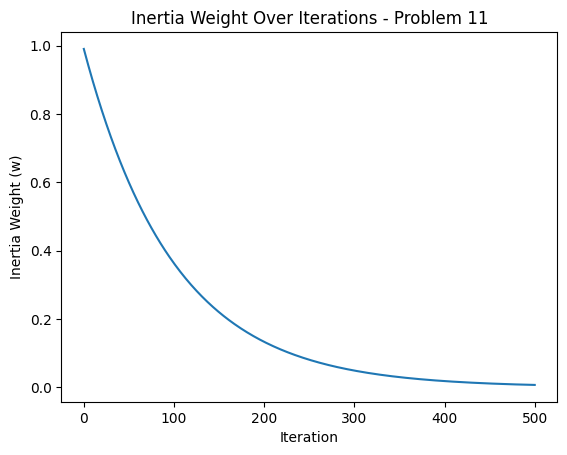

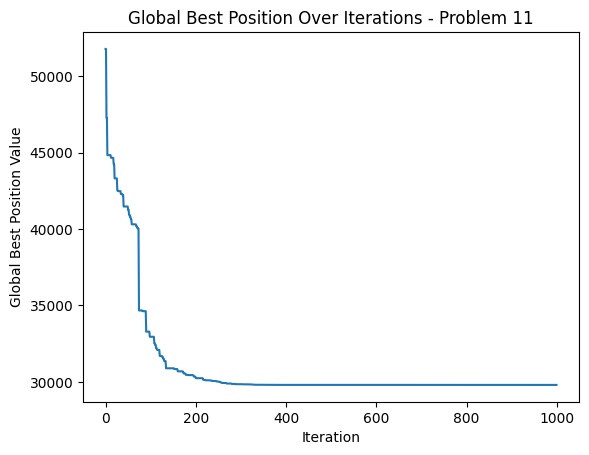




Problem 12 Best Cost: [43841.88166373 43841.88166373 32041.57178656 32041.57178656
 32041.57178656 32041.57178656 32041.57178656 32041.57178656
 32041.57178656 32041.57178656 32041.57178656 32041.57178656
 29530.82306903 29530.82306903 29530.82306903 29371.40432581
 29371.40432581 29371.40432581 29371.40432581 28728.65529384
 25804.632561   25322.74535385 25322.74535385 25322.74535385
 25322.74535385 25322.74535385 24498.24632927 24498.24632927
 24228.95320969 24228.95320969 24228.95320969 21207.18726749
 21207.18726749 21207.18726749 21207.18726749 21207.18726749
 21207.18726749 21207.18726749 21207.18726749 21207.18726749
 21181.69941153 21181.69941153 20588.21597308 20588.21597308
 20588.21597308 19699.09946729 18721.4750387  18721.4750387
 18721.4750387  18721.4750387  18721.4750387  18721.4750387
 18721.4750387  18289.2170551  18289.2170551  18289.2170551
 18289.2170551  18289.2170551  18289.2170551  18289.2170551
 18289.2170551  18007.88307535 18007.88307535 18007.88307535
 18

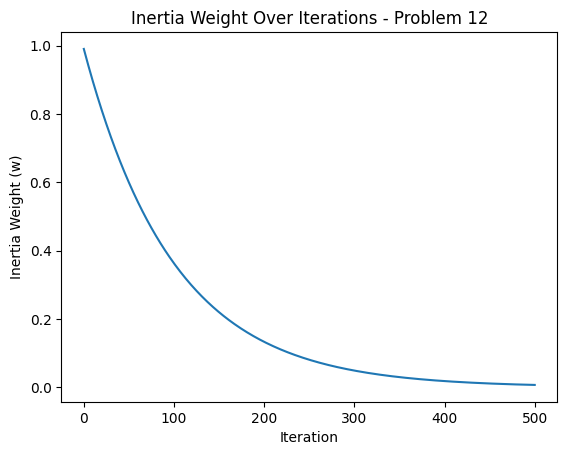

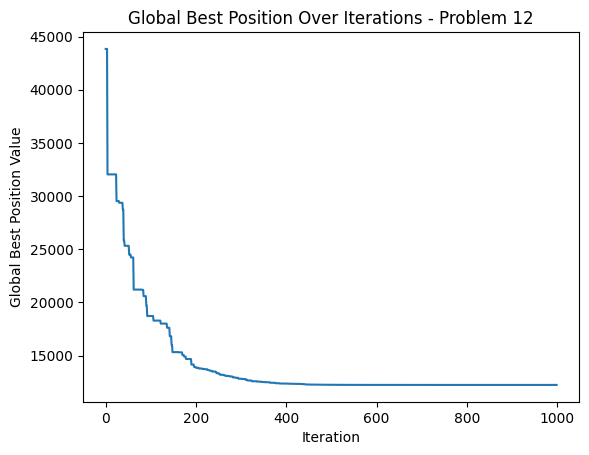




Problem 13 Best Cost: [142172.11392848 142172.11392848 103778.4382825  103778.4382825
  97892.83352596  97892.83352596  80884.55219197  80884.55219197
  80884.55219197  80884.55219197  80884.55219197  80884.55219197
  80884.55219197  80884.55219197  80884.55219197  80884.55219197
  77778.9381088   77778.9381088   77778.9381088   77778.9381088
  77778.9381088   77778.9381088   77778.9381088   73305.09163846
  73305.09163846  73305.09163846  63590.57409539  63590.57409539
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  36010.75635078  36010.75635078  36010.75635078  36010.75635078
  

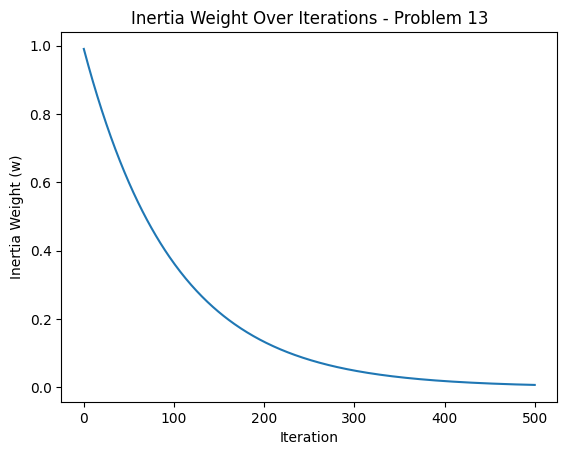

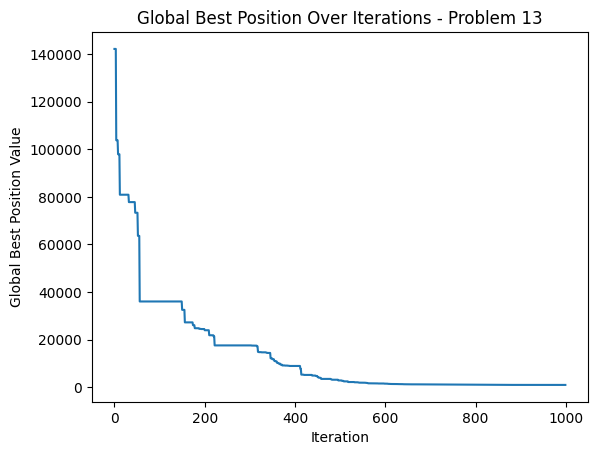




Problem 14 Best Cost: [23732.54103213 23732.54103213 23431.46286451 23431.46286451
 23218.56285984 22879.0281733  22879.0281733  20585.87329847
 17319.95609963 17319.95609963 17319.95609963 17319.95609963
 16787.58317855 16086.28536862 16086.28536862 16086.28536862
 16086.28536862 16086.28536862 16086.28536862 16086.28536862
 16086.28536862 16086.28536862 16086.28536862 16086.28536862
 16086.28536862 16086.28536862 15587.81465796 15587.81465796
 15587.81465796 15587.81465796 15587.81465796 15587.81465796
 15587.81465796 15045.62555616 15045.62555616 15045.62555616
 15045.62555616 15045.62555616 15045.62555616 15045.62555616
 15045.62555616 14436.69342708 14436.69342708 14436.69342708
 14375.70574445 13566.46025789 13566.46025789 13317.97200163
 13317.97200163 13317.97200163 13317.97200163 13317.97200163
 13317.97200163 13317.97200163 13317.97200163 13317.97200163
 13317.97200163 13317.97200163 13317.97200163 13265.05015872
 13265.05015872 13265.05015872 13265.05015872 13129.83438829

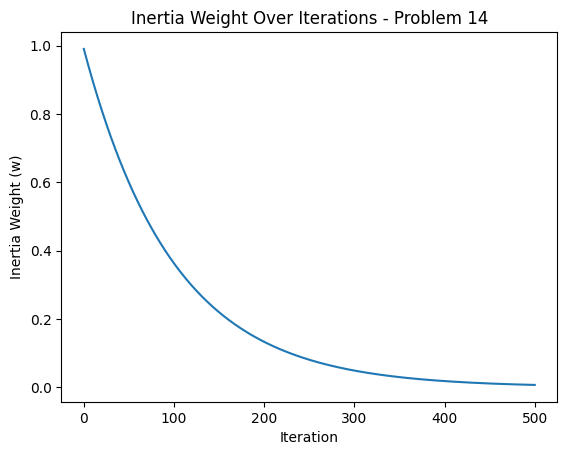

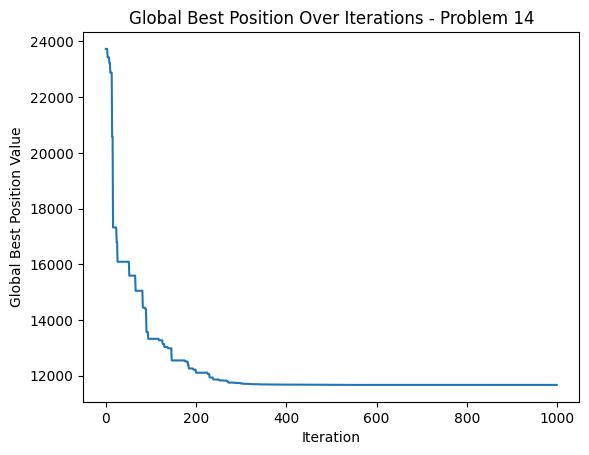




Problem 15 Best Cost: [-224.2615334  -224.2615334  -224.40882698 -225.04645806 -225.04645806
 -225.09732218 -225.68479552 -225.68479552 -225.93560985 -226.10994245
 -226.10994245 -226.10994245 -226.10994245 -226.62496678 -226.62496678
 -226.62496678 -226.62496678 -226.96021904 -226.96021904 -226.98378957
 -226.98378957 -226.98378957 -227.03419958 -227.03419958 -227.03419958
 -227.03419958 -227.17458119 -227.17458119 -227.17458119 -227.34540598
 -227.34540598 -227.34540598 -227.34540598 -227.34540598 -227.34540598
 -227.34540598 -227.34540598 -227.34540598 -227.34540598 -227.34540598
 -227.34540598 -227.34540598 -227.53942955 -227.54141006 -227.54141006
 -227.54141006 -227.54141006 -227.54141006 -227.54141006 -227.54141006
 -227.65618838 -227.65618838 -227.65618838 -227.65618838 -227.65618838
 -227.65618838 -227.65618838 -227.65618838 -227.65618838 -227.65618838
 -227.65618838 -227.65618838 -227.65618838 -227.65618838 -227.65618838
 -227.65618838 -227.65618838 -227.65618838 -227.6636

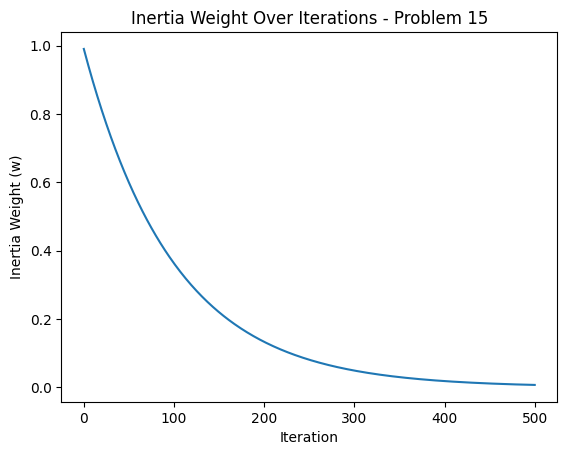

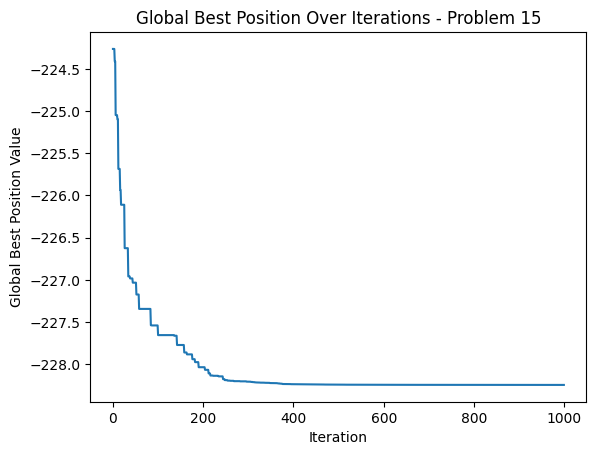




Problem 16 Best Cost: [47481.02008896 38913.19436292 26738.13419678 22188.19316092
 14329.89019285 10162.99816457  7413.21401168  5878.08918579
  4484.3435955   2427.65531955  -105.33123097  -105.33123097
  -242.80968211 -1516.56090793 -1858.16033895 -2325.17438546
 -2614.68067032 -3142.52843302 -3352.50992838 -3471.50828345
 -3471.50828345 -3471.50828345 -3752.82588938 -3752.82588938
 -3752.82588938 -3759.32603397 -3759.32603397 -3769.47495837
 -3868.835643   -3938.08145434 -4017.61581471 -4017.61581471
 -4017.61581471 -4044.96973509 -4044.96973509 -4054.48992007
 -4067.76427659 -4067.76427659 -4081.38649528 -4081.38649528
 -4129.6809985  -4129.6809985  -4143.02215873 -4158.30626524
 -4158.30626524 -4194.25120464 -4194.25120464 -4194.25120464
 -4194.25120464 -4194.25120464 -4226.03585517 -4232.5954194
 -4232.5954194  -4242.78883497 -4242.78883497 -4256.31918267
 -4256.31918267 -4256.31918267 -4256.31918267 -4263.20415955
 -4270.43672825 -4270.43672825 -4277.27185338 -4281.36964401


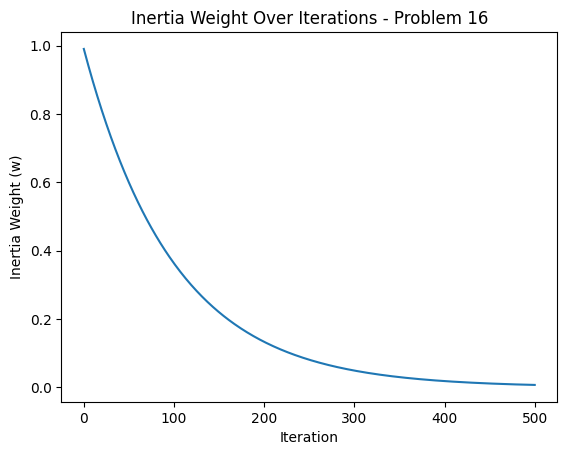

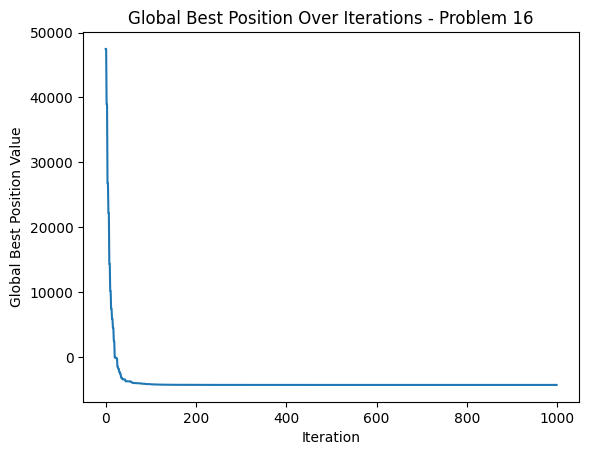




Problem 17 Best Cost: [ 2.51149908e+06  1.92397384e+06  1.65732541e+06  1.32580416e+06
  8.37260008e+05  4.54321689e+05  4.36855571e+05  3.56788409e+05
  3.56788409e+05  3.20571695e+05  2.55113145e+05  1.85530332e+05
  1.61293504e+05  1.40406725e+05  1.27969498e+05  1.18753239e+05
  1.12995503e+05  7.74813351e+04  7.74813351e+04  6.83180922e+04
  6.83180922e+04  5.42114648e+04  5.42114648e+04  5.26412264e+04
  5.14559584e+04  5.02613981e+04  4.45755900e+04  3.36011428e+04
  3.08437077e+04  3.08437077e+04  3.08437077e+04  2.80576991e+04
  2.80576991e+04  2.58639337e+04  2.36401088e+04  1.99461644e+04
  1.73878920e+04  1.60707240e+04  1.59121054e+04  1.18603499e+04
  1.15600164e+04  1.07221034e+04  1.07221034e+04  9.20320122e+03
  9.20320122e+03  9.20320122e+03  9.18470946e+03  8.38058328e+03
  8.00090297e+03  8.00090297e+03  8.00090297e+03  6.89664316e+03
  6.89664316e+03  6.89664316e+03  6.89664316e+03  5.78423693e+03
  4.71998406e+03  4.71998406e+03  4.68236457e+03  4.18054951e+03


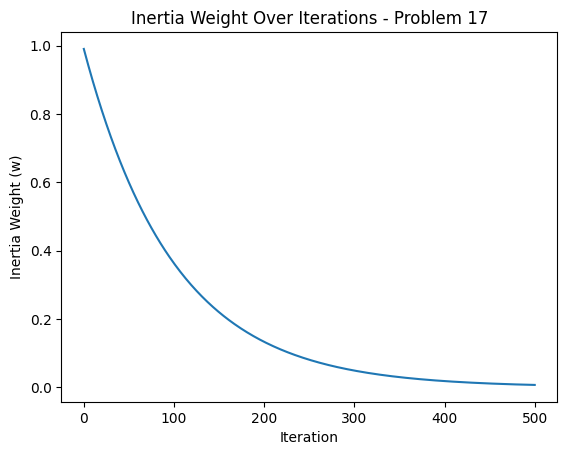

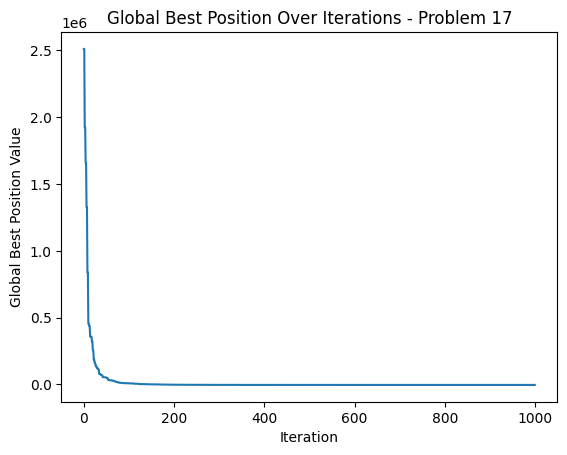




Problem 18 Best Cost: [33258.96364088 33258.96364088 29933.70830639 29933.70830639
 28409.8038508  27358.26838875 27358.26838875 27358.26838875
 27358.26838875 27358.26838875 27358.26838875 27358.26838875
 27358.26838875 26836.14219315 26099.00339691 26099.00339691
 25096.29082809 25096.29082809 20760.24921045 20760.24921045
 20760.24921045 20760.24921045 20760.24921045 20760.24921045
 20760.24921045 20760.24921045 20760.24921045 20760.24921045
 20760.24921045 20760.24921045 20608.66526016 20117.14565981
 20117.14565981 20117.14565981 20073.91037715 20030.18078323
 19721.48862508 19560.40182931 19560.40182931 19457.66381239
 19457.66381239 18956.32935096 18956.32935096 18956.32935096
 18545.08893302 18545.08893302 18545.08893302 18545.08893302
 18510.70791422 18510.70791422 18510.70791422 18326.00159532
 18326.00159532 18326.00159532 18326.00159532 18287.16568007
 18287.16568007 18287.16568007 18234.55673242 18234.55673242
 18156.82066229 18156.82066229 17744.59229773 17744.59229773

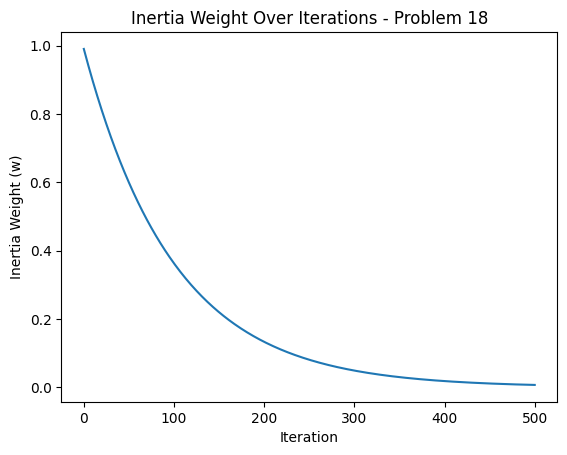

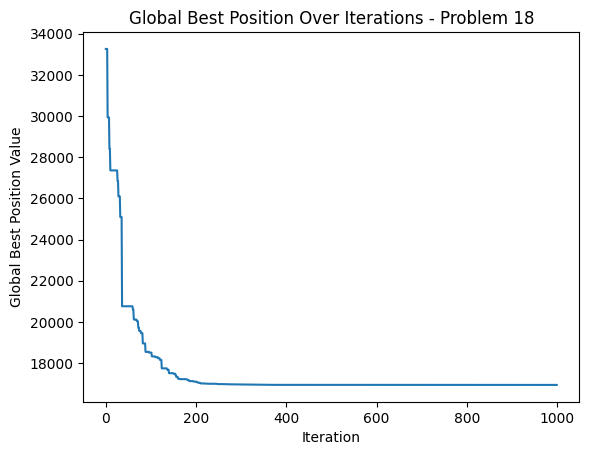




Problem 19 Best Cost: [37505.87413674 32902.87768365 32731.86013084 32731.86013084
 32731.86013084 32179.54232178 32179.54232178 32179.54232178
 31923.18575928 31923.18575928 31064.12061923 31064.12061923
 30547.1779445  30547.1779445  28585.56333047 28585.56333047
 28585.56333047 24437.45196422 24437.45196422 23581.84379238
 23581.84379238 23581.84379238 23581.84379238 22188.92189086
 22188.92189086 19755.94652888 19755.94652888 19150.62479011
 19150.62479011 19150.62479011 19150.62479011 18690.4618743
 18690.4618743  18690.4618743  18690.4618743  16440.86395641
 16360.05020447 16360.05020447 16360.05020447 16360.05020447
 15940.34945553 15940.34945553 15586.23548671 15586.23548671
 15555.74119811 15555.74119811 15555.74119811 15492.79624974
 15465.69264172 15340.38841639 15340.38841639 14798.11638614
 14798.11638614 14798.11638614 14796.11402358 14676.04907252
 14279.07628167 14119.02394947 14053.58646645 13864.800024
 13864.800024   13864.800024   13864.800024   13629.63075321
 1

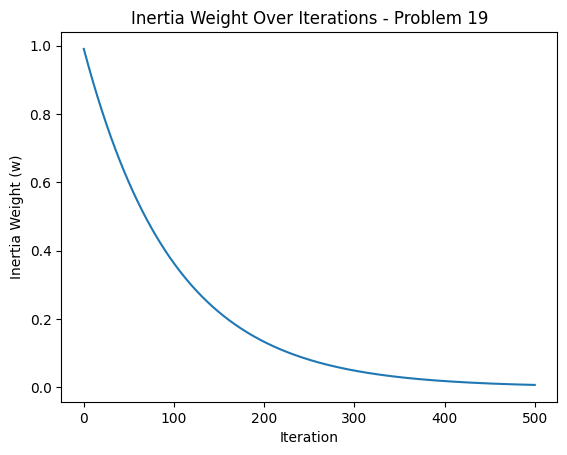

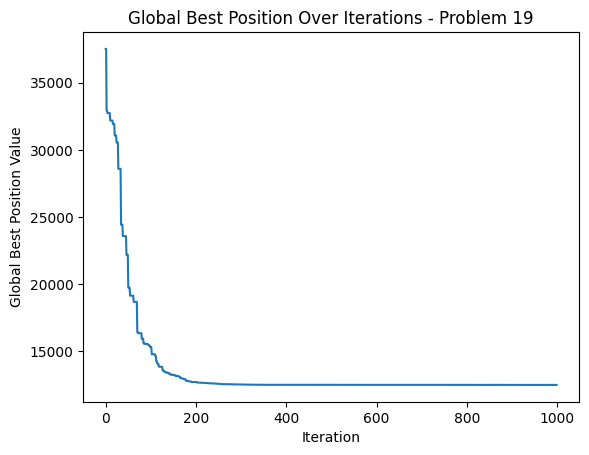




Problem 20 Best Cost: [-83.96693983 -84.3899534  -86.87701196 -88.28977625 -88.97918954
 -90.29259707 -90.29259707 -90.63502555 -90.9158614  -91.46931093
 -91.74901467 -91.76543796 -92.04327019 -92.04327019 -92.43476184
 -92.43476184 -92.6230174  -92.6416227  -92.77223487 -92.95968329
 -92.95968329 -92.95968329 -92.95968329 -92.95968329 -92.95968329
 -92.95968329 -93.03202224 -93.03202224 -93.03202224 -93.11417854
 -93.11417854 -93.11417854 -93.11417854 -93.18035994 -93.18035994
 -93.18035994 -93.18035994 -93.20139424 -93.45839816 -93.75393197
 -93.75393197 -93.75393197 -93.75393197 -93.75393197 -93.75393197
 -93.75393197 -93.75393197 -93.75393197 -93.75393197 -93.75393197
 -93.75393197 -93.75393197 -93.75393197 -93.79097608 -93.8003881
 -93.8003881  -93.8003881  -93.8003881  -93.8003881  -93.81421479
 -93.81421479 -93.81421479 -93.85884734 -93.85884734 -93.85884734
 -93.85884734 -94.33947814 -94.33947814 -94.33947814 -94.33947814
 -94.33947814 -94.33947814 -94.33947814 -94.33947814

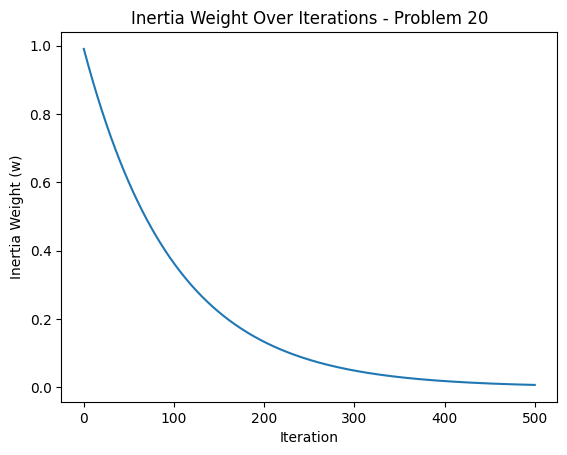

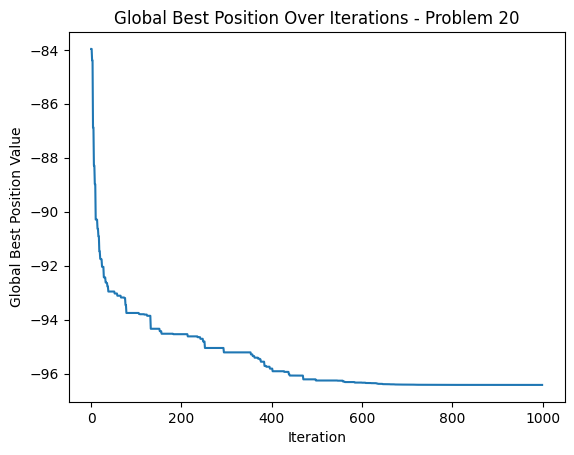




Problem 21 Best Cost: [-42.37451425 -43.35014021 -43.70811756 -43.70811756 -43.70811756
 -43.70811756 -43.70811756 -43.70811756 -43.70811756 -43.70811756
 -43.70811756 -43.70811756 -43.70811756 -43.70811756 -43.73925784
 -43.73925784 -43.73925784 -43.73925784 -43.83871583 -43.89430692
 -43.89430692 -43.89430692 -43.92189405 -43.92189405 -43.92189405
 -43.92541988 -43.92541988 -43.94307304 -43.94307304 -43.94307304
 -43.94307304 -43.94307304 -43.94689099 -43.9802614  -43.9802614
 -43.9802614  -43.9802614  -43.99208542 -44.0141974  -44.0141974
 -44.0141974  -44.16594862 -44.16594862 -44.16594862 -44.16594862
 -44.16594862 -44.16594862 -44.16639122 -44.18674709 -44.22593311
 -44.30245345 -44.30269538 -44.37100407 -44.37100407 -44.37100407
 -44.37100407 -44.37100407 -44.39621551 -44.48934697 -44.48934697
 -44.54274405 -44.54274405 -44.54274405 -44.54274405 -44.54274405
 -44.54274405 -44.56598447 -44.58066826 -44.58066826 -44.58404372
 -44.58404372 -44.59236371 -44.62680953 -44.62680953 

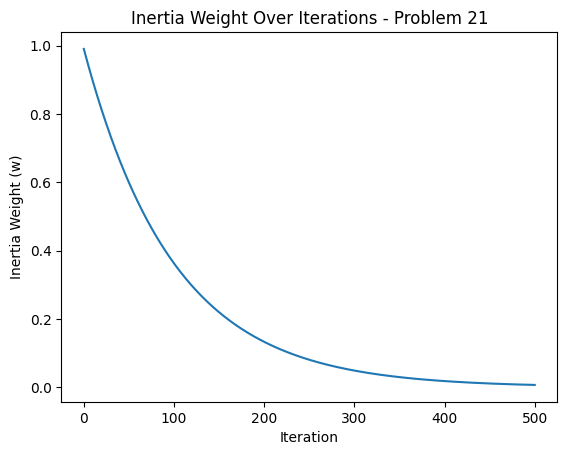

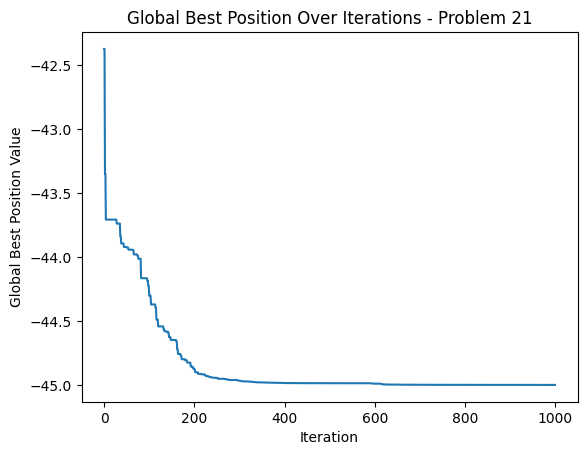




Problem 22 Best Cost: [259296.97489726 233413.99414391 213229.95859742 182881.85605748
 171930.76501229 154638.49855488 154638.49855488 154638.49855488
 154638.49855488 154638.49855488 154638.49855488 154638.49855488
 154594.32368519 154594.32368519 154594.32368519 154594.32368519
 154594.32368519 154594.32368519 154594.32368519 143519.02844638
 141747.91736619 141747.91736619 141747.91736619 141747.91736619
 141747.91736619 141747.91736619 141747.91736619 141747.91736619
 141747.91736619 141747.91736619 122164.81876399 122164.81876399
 122164.81876399 119558.61895075 119558.61895075 119558.61895075
 119558.61895075 119558.61895075 119558.61895075 119558.61895075
 119558.61895075 115927.78133736 113582.87738656  99119.50172615
  99119.50172615  99119.50172615  99119.50172615  99119.50172615
  97510.87883406  97510.87883406  97510.87883406  97510.87883406
  93784.20744726  93784.20744726  93784.20744726  93784.20744726
  93784.20744726  90754.21728115  89773.6545716   87436.89867602


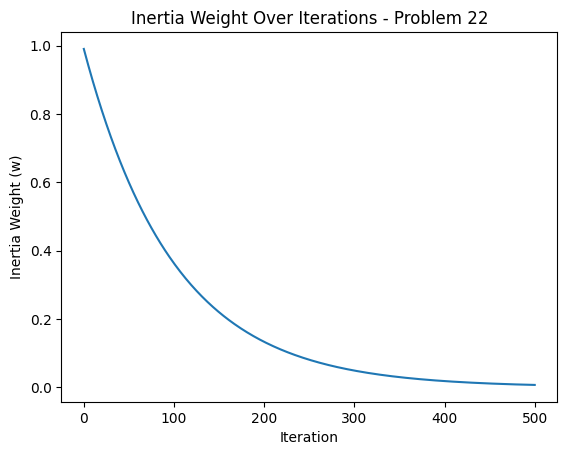

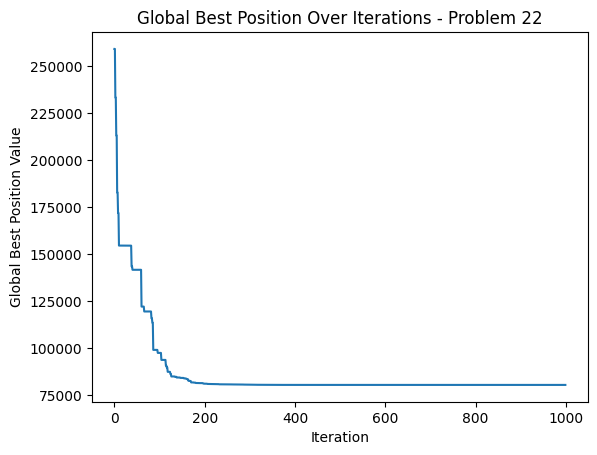




Problem 23 Best Cost: [-33.37423642 -39.23307996 -39.23307996 -39.51644829 -41.88598847
 -41.88598847 -41.94294095 -41.94294095 -43.24174136 -43.96616018
 -44.11445214 -44.42630707 -44.68892821 -45.25290641 -45.84084959
 -46.56816702 -46.56816702 -46.56816702 -46.56816702 -46.56816702
 -46.56816702 -46.56816702 -46.85027656 -47.11675841 -47.62480459
 -47.62480459 -47.62480459 -47.64889107 -47.95322856 -47.96783533
 -47.96783533 -47.96783533 -47.96783533 -48.10034741 -48.10034741
 -48.10034741 -48.16831698 -48.28999405 -48.3052401  -48.38206063
 -48.38206063 -48.38639066 -48.38639066 -48.68444933 -48.68444933
 -48.8162756  -48.8162756  -48.920081   -48.920081   -48.93114948
 -48.9418382  -48.9775954  -48.9775954  -49.09705538 -49.14632089
 -49.14632089 -49.16189457 -49.16189457 -49.21684225 -49.21684225
 -49.23246509 -49.23246509 -49.31020947 -49.31081454 -49.34483448
 -49.34483448 -49.36048729 -49.3809636  -49.41455577 -49.42172442
 -49.42172442 -49.46754452 -49.49682927 -49.5176452

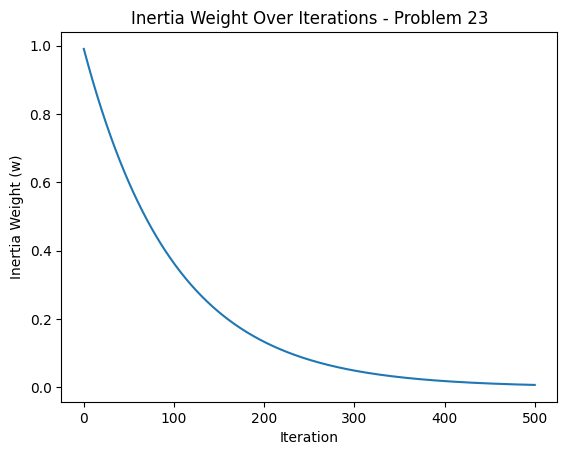

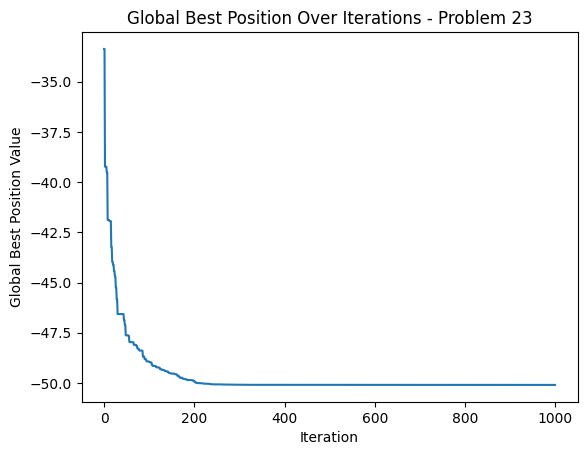




Problem 24 Best Cost: [106.15859151  99.09279721  99.09279721  99.09279721  99.09279721
  96.10155773  96.07646758  88.05601203  81.07347911  81.07347911
  81.07347911  81.07347911  81.07347911  81.07347911  81.07347911
  75.04569069  75.04569069  74.99415384  74.99415384  73.63883867
  73.63883867  73.63883867  72.28981461  69.79362814  69.79362814
  69.79362814  69.79362814  69.79362814  69.79362814  69.79362814
  65.12425917  65.12425917  64.51642645  50.18586476  50.18586476
  50.18586476  50.18586476  50.18586476  50.18586476  50.18586476
  50.18586476  50.18586476  50.18586476  50.18586476  50.18586476
  50.18586476  48.49330401  48.49330401  48.49330401  48.49330401
  48.49330401  46.90313953  46.90313953  42.70096198  42.70096198
  42.70096198  42.70096198  42.70096198  42.70096198  42.70096198
  42.70096198  42.70096198  42.70096198  42.70096198  42.70096198
  42.70096198  41.90776706  41.90776706  41.90776706  41.90776706
  41.90776706  41.90776706  41.90776706  41.9077670

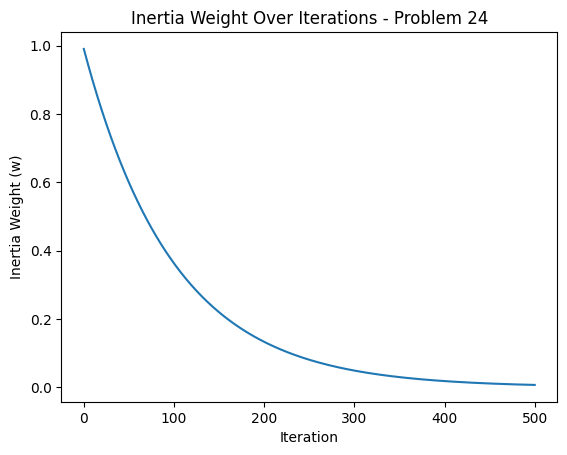

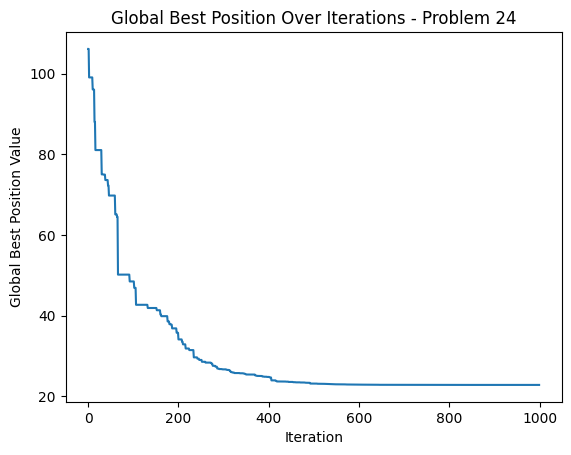

In [96]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [97]:
print('nice')

nice


In [98]:
print('almost complete')

almost complete


In [99]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [100]:
print('ok')

ok


In [101]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [102]:
# print(w_response)